### EDA_Totales VMD.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Totales de velocidad media descargada (VMD)."**, la cual permite evaluar el 
rendimiento del servicio de internet en términos de velocidad.

### Objetivo del Análisis
El propósito de este análisis es **examinar las velocidades medias de descarga en diferentes regiones de Argentina**, 
identificando variaciones y posibles limitaciones en la infraestructura de red.

In [26]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Totales VMD.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [27]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Periodo']


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     42 non-null     int64 
 1   Trimestre               42 non-null     int64 
 2   Mbps (Media de bajada)  42 non-null     int64 
 3   Periodo                 42 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.4+ KB
None


In [29]:
print(df.head())

    Año  Trimestre  Mbps (Media de bajada)        Periodo
0  2024          2                     139   Abr-Jun 2024
1  2024          1                     139   Ene-Mar 2024
2  2023          4                     139   Oct-Dic 2023
3  2023          3                     129  Jul-Sept 2023
4  2023          2                     123   Abr-Jun 2023


In [30]:
import sweetviz as sv
from skimpy import skim

In [31]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     42 non-null     int64 
 1   Trimestre               42 non-null     int64 
 2   Mbps (Media de bajada)  42 non-null     int64 
 3   Periodo                 42 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.4+ KB
None
    Año  Trimestre  Mbps (Media de bajada)        Periodo
0  2024          2                     139   Abr-Jun 2024
1  2024          1                     139   Ene-Mar 2024
2  2023          4                     139   Oct-Dic 2023
3  2023          3                     129  Jul-Sept 2023
4  2023          2                     123   Abr-Jun 2023


In [32]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ int64       │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                   ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Año                      │   0 │     0 │    2019 │  3.075 │  2014 │  2016 │  2019 │  2021 │  2024 │ ▇▇▃▇▇▆ │  │
│ │ Trimestre                │   0 │     0 │   2.452 │  1.131 │     1 │  1.25 │     2 │     3 │     4 │ ▇ ▇ ▇▇ │  │
│ │ Mbps (Media de bajada)   │   0 │     0 │   38.88 │  43.68 │     3 │  5.25 │  18.5 │    51 │   139 │ ▇▃▁ ▁▂ │  │
│ └──────────────────────────┴─────┴───────┴─────────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃         ┃    ┃      ┃           ┃           ┃            ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column  ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min        ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Periodo │  0 │    0 │ Abr-Jun   │ Jul-Sept  │ Abr-Jun    │ Oct-Dic   │       12.2 │         2 │         84 │  │
│ │         │    │      │ 2024      │ 2023      │ 2014       │ 2023      │            │           │            │  │
│ └─────────┴────┴──────┴───────────┴───────────┴────────────┴───────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [33]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     42 non-null     int64 
 1   Trimestre               42 non-null     int64 
 2   Mbps (Media de bajada)  42 non-null     int64 
 3   Periodo                 42 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.4+ KB
None



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año  Trimestre  Mbps (Media de bajada)       Periodo
count     42.000000  42.000000               42.000000            42
unique          NaN        NaN                     NaN            42
top             NaN        NaN                     NaN  Abr-Jun 2024
freq            NaN        NaN                     NaN             1
mean    2018.761905   2.452381               38.880952           NaN
std        3.074756   1.130560               43.677422           NaN
min     2014.000000   1.000000                3.000000           NaN
25%     2016.000000   1.250000                5.250000           NaN
50%     2019.000000   2.000000               18.500000           NaN
75%     2021.000000   3.000000               51.000000           NaN
max     2024.000000   4.000000              139.000000           NaN


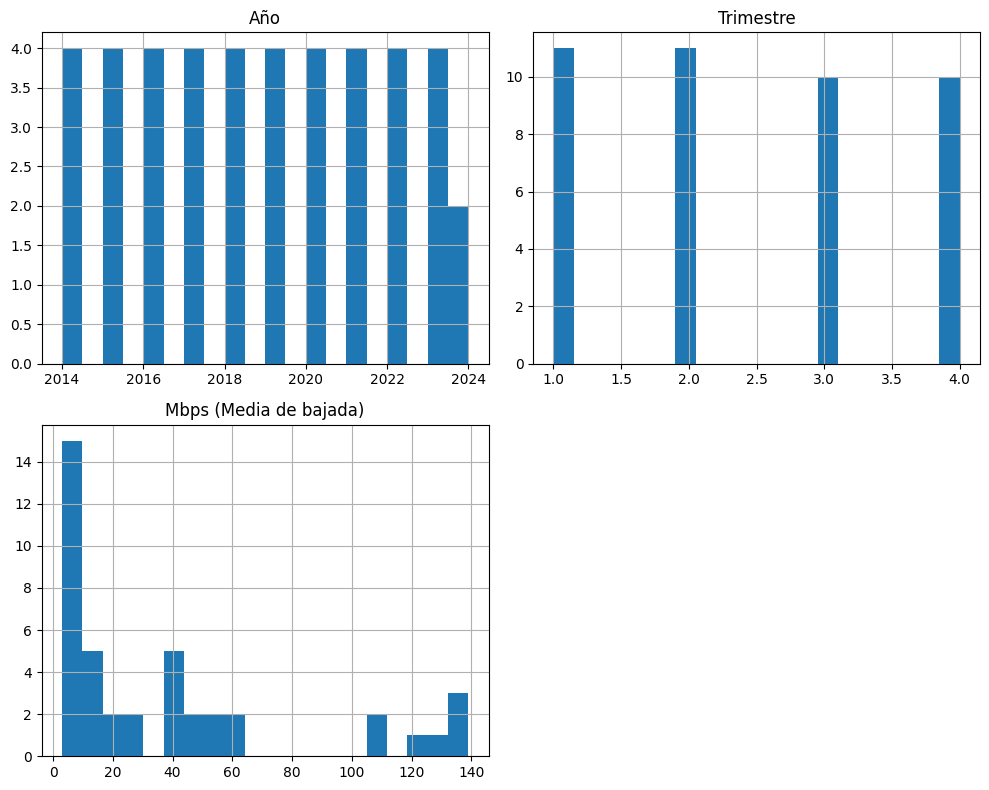

In [34]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                             Año  Trimestre  Mbps (Media de bajada)
Año                     1.000000  -0.073505                0.879884
Trimestre              -0.073505   1.000000               -0.008267
Mbps (Media de bajada)  0.879884  -0.008267                1.000000


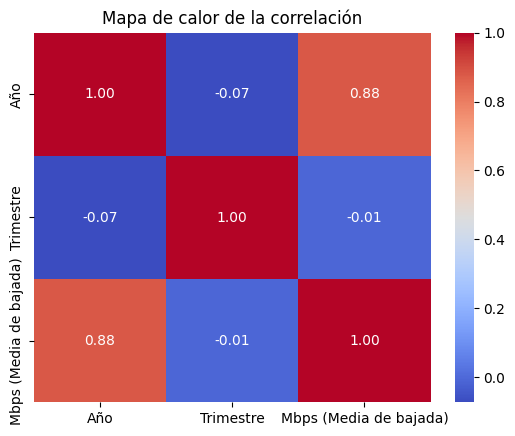

In [35]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [36]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

In [37]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
         Año  Trimestre  Mbps (Media de bajada)
0   1.724231  -0.404989                2.320024
1   1.724231  -1.300229                2.320024
2   1.395060   1.385490                2.320024
3   1.395060   0.490250                2.088297
4   1.395060  -0.404989                1.949261
5   1.395060  -1.300229                1.648017
6   1.065888   1.385490                1.555326
7   1.065888   0.490250                0.535730
8   1.065888  -0.404989                0.443039
9   1.065888  -1.300229                0.373521
10  0.736717   1.385490                0.304003
11  0.736717   0.490250                0.211313
12  0.736717  -0.404989                0.141795
13  0.736717  -1.300229                0.095449
14  0.407546   1.385490                0.072277
15  0.407546   0.490250                0.025931
16  0.407546  -0.404989               -0.020414
17  0.407546  -1.300229               -0.043587
18  0.078374   1.385490               -0.252141
19 

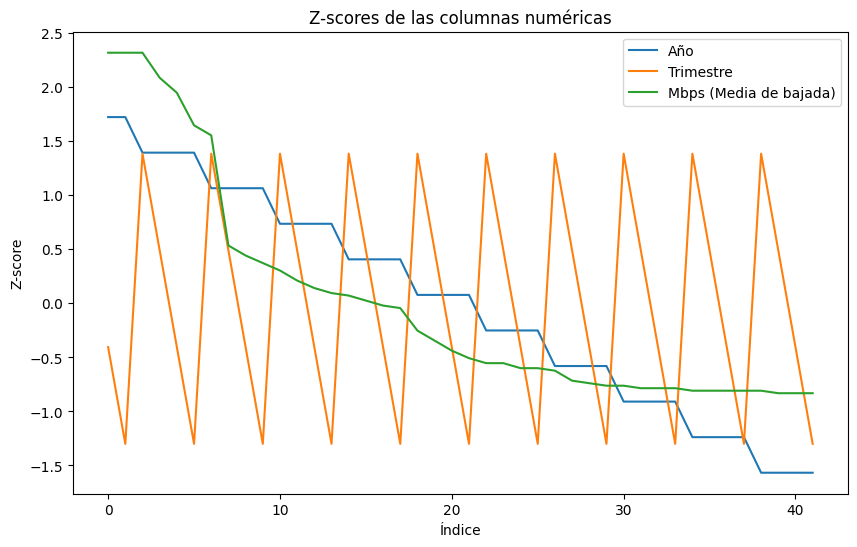

In [38]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [39]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Periodo':
Periodo
Abr-Jun 2024     1
Ene-Mar 2024     1
Oct-Dic 2023     1
Jul-Sept 2023    1
Abr-Jun 2023     1
Ene-Mar 2023     1
Oct-Dic 2022     1
Jul-Sept 2022    1
Abr-Jun 2022     1
Ene-Mar 2022     1
Oct-Dic 2021     1
Jul-Sept 2021    1
Abr-Jun 2021     1
Ene-Mar 2021     1
Oct-Dic 2020     1
Jul-Sept 2020    1
Abr-Jun 2020     1
Ene-Mar 2020     1
Oct-Dic 2019     1
Jul-Sept 2019    1
Abr-Jun 2019     1
Ene-Mar 2019     1
Oct-Dic 2018     1
Jul-Sept 2018    1
Abr-Jun 2018     1
Ene-Mar 2018     1
Oct-Dic 2017     1
Jul-Sept 2017    1
Abr-Jun 2017     1
Ene-Mar 2017     1
Oct-Dic 2016     1
Jul-Sept 2016    1
Abr-Jun 2016     1
Ene-Mar 2016     1
Oct-Dic 2015     1
Jul-Sept 2015    1
Abr-Jun 2015     1
Ene-Mar 2015     1
Oct-Dic 2014     1
Jul-Sept 2014    1
Abr-Jun 2014     1
Ene-Mar 2014     1
Name: count, dtype: int64


In [40]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


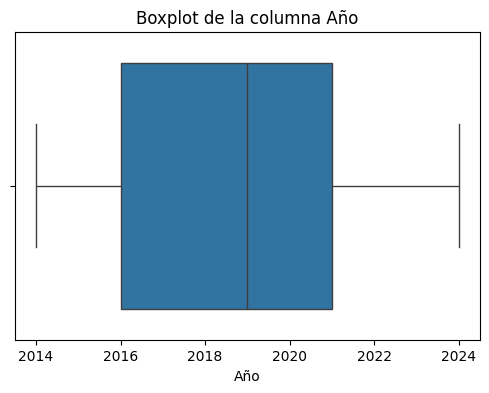

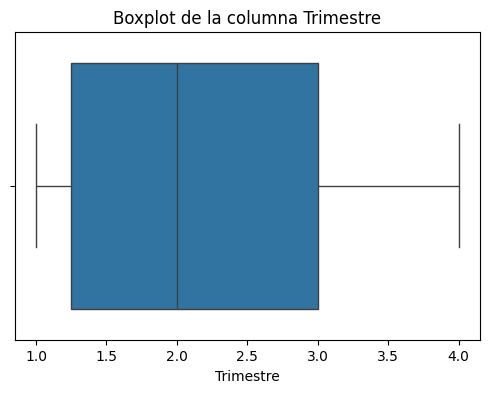

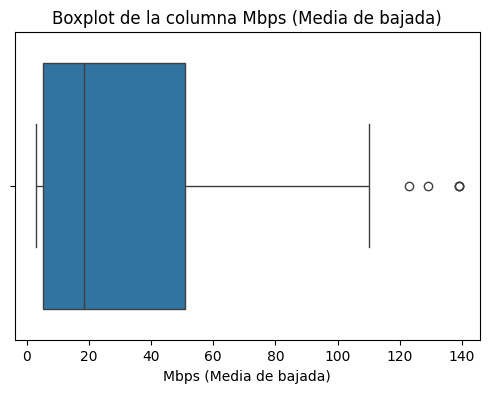

In [41]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [42]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Totales VMD.csv


In [43]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                       0.024172
Trimestre                 0.070729
Mbps (Media de bajada)    1.328763
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                      -1.186795
Trimestre                -1.371727
Mbps (Media de bajada)    0.545403
dtype: float64


In [44]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                 Variable           VIF
0                   const  1.990476e+06
1                     Año  4.516343e+00
2               Trimestre  1.019882e+00
3  Mbps (Media de bajada)  4.492249e+00


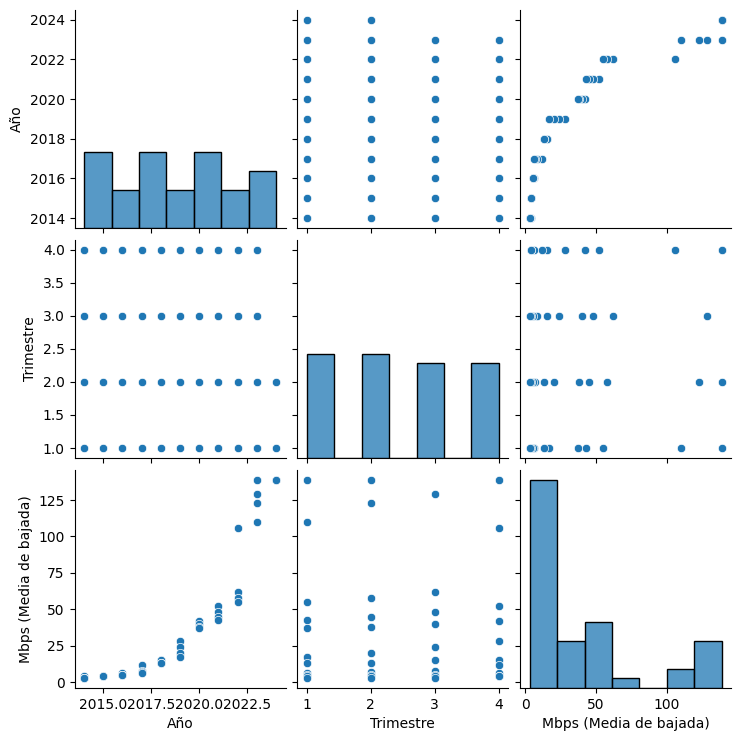

In [45]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [46]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Periodo':
                Año                                                      \
              count    mean std     min     25%     50%     75%     max   
Periodo                                                                   
Abr-Jun 2014    1.0  2014.0 NaN  2014.0  2014.0  2014.0  2014.0  2014.0   
Abr-Jun 2015    1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Abr-Jun 2016    1.0  2016.0 NaN  2016.0  2016.0  2016.0  2016.0  2016.0   
Abr-Jun 2017    1.0  2017.0 NaN  2017.0  2017.0  2017.0  2017.0  2017.0   
Abr-Jun 2018    1.0  2018.0 NaN  2018.0  2018.0  2018.0  2018.0  2018.0   
Abr-Jun 2019    1.0  2019.0 NaN  2019.0  2019.0  2019.0  2019.0  2019.0   
Abr-Jun 2020    1.0  2020.0 NaN  2020.0  2020.0  2020.0  2020.0  2020.0   
Abr-Jun 2021    1.0  2021.0 NaN  2021.0  2021.0  2021.0  2021.0  2021.0   
Abr-Jun 2022    1.0  2022.0 NaN  2022.0  2022.0  2022.0  2022.0  2022.0   
Abr-Jun 2023    1.0  2023.0 NaN  2023.0  2023.0  2023.0  2023.

In [47]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Periodo':
                  Año  Trimestre  Mbps (Media de bajada)
Periodo                                                 
Abr-Jun 2014   2014.0        2.0                     3.0
Abr-Jun 2015   2015.0        2.0                     4.0
Abr-Jun 2016   2016.0        2.0                     5.0
Abr-Jun 2017   2017.0        2.0                     7.0
Abr-Jun 2018   2018.0        2.0                    13.0
Abr-Jun 2019   2019.0        2.0                    20.0
Abr-Jun 2020   2020.0        2.0                    38.0
Abr-Jun 2021   2021.0        2.0                    45.0
Abr-Jun 2022   2022.0        2.0                    58.0
Abr-Jun 2023   2023.0        2.0                   123.0
Abr-Jun 2024   2024.0        2.0                   139.0
Ene-Mar 2014   2014.0        1.0                     3.0
Ene-Mar 2015   2015.0        1.0                     4.0
Ene-Mar 2016   2016.0        1.0                     5.0
Ene-Mar 2017   2017.0        1.0                  

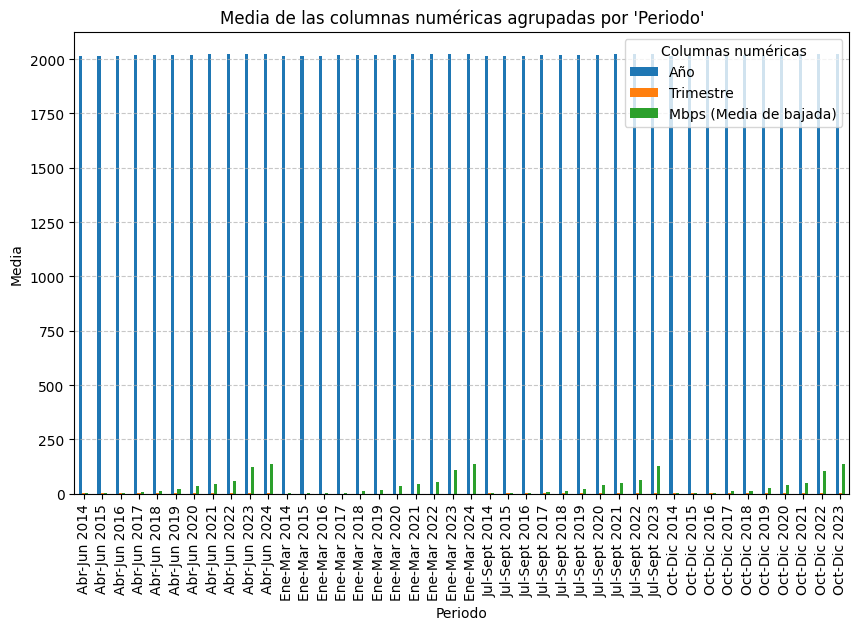

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     42 non-null     int64 
 1   Trimestre               42 non-null     int64 
 2   Mbps (Media de bajada)  42 non-null     int64 
 3   Periodo                 42 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.4+ KB
None


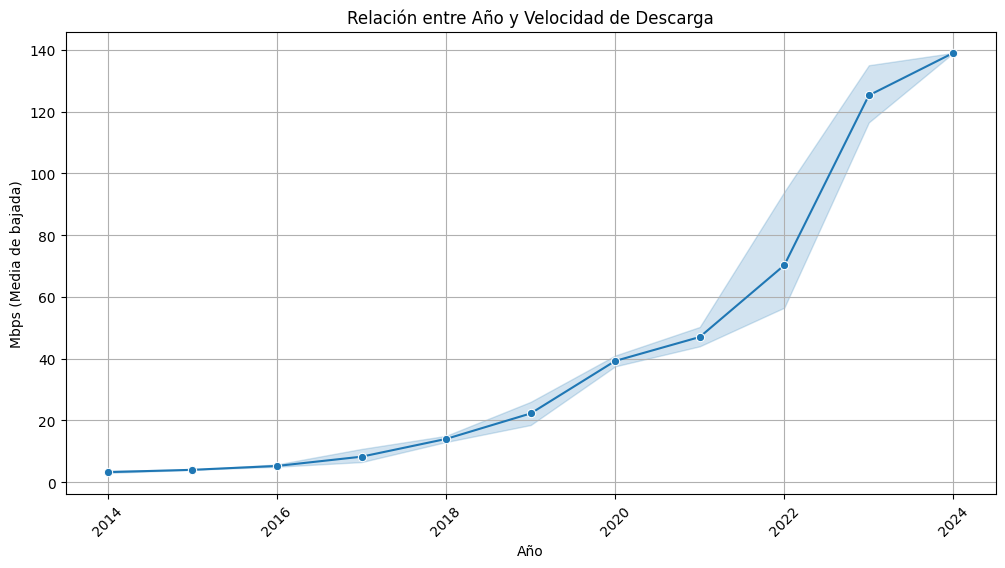

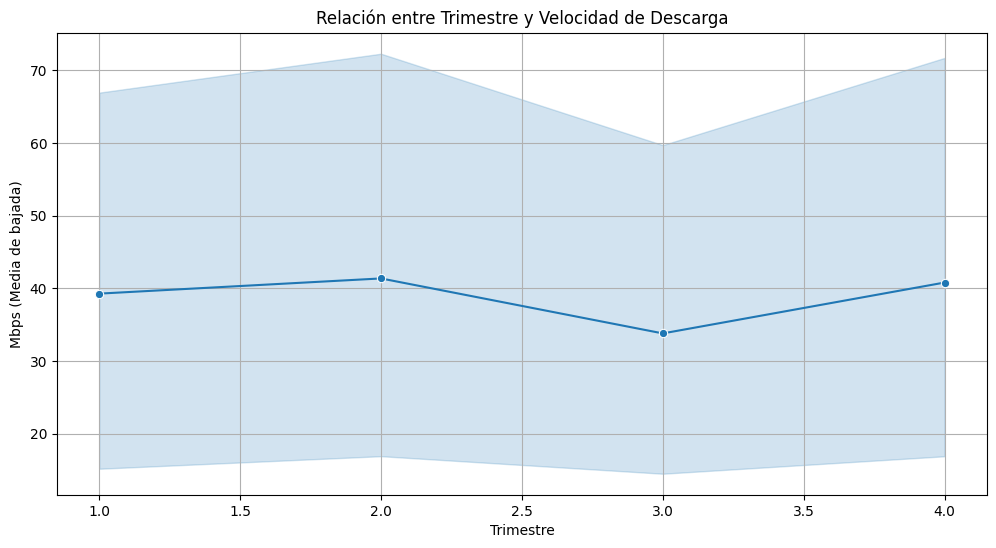

In [50]:
import seaborn as sns

import matplotlib.pyplot as plt

# Graficar la relación entre Año y Mbps (Media de bajada)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Año', y='Mbps (Media de bajada)', marker='o')
plt.title('Relación entre Año y Velocidad de Descarga')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Graficar la relación entre Trimestre y Mbps (Media de bajada)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Trimestre', y='Mbps (Media de bajada)', marker='o')
plt.title('Relación entre Trimestre y Velocidad de Descarga')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.show()

# Análisis Exploratorio de Datos (EDA) - Velocidad Media Descargada (VMD)

## Introducción

Este proyecto realiza un análisis exploratorio de datos (EDA) sobre el conjunto de datos proporcionado por el **Ente Nacional de Comunicaciones (ENACOM)** de Argentina. El objetivo es examinar las velocidades medias de descarga en diferentes regiones de Argentina, identificando variaciones y posibles limitaciones en la infraestructura de red.

## Descripción del Conjunto de Datos

El conjunto de datos utilizado en este análisis se centra en la hoja de datos **"Totales de velocidad media descargada (VMD)."**. Este conjunto de datos permite evaluar el rendimiento del servicio de internet en términos de velocidad.

## Objetivo del Análisis

El propósito de este análisis es **examinar las velocidades medias de descarga en diferentes regiones de Argentina**, identificando variaciones y posibles limitaciones en la infraestructura de red.

## Contenido del Notebook

1. **Cargar el archivo y normalizar los nombres**: Se carga el archivo CSV y se verifica su existencia.
2. **Exploración inicial de los datos**:
    - Extracción y visualización de los nombres de las columnas.
    - Información general del DataFrame.
    - Visualización de las primeras filas del DataFrame.
3. **Análisis exploratorio**:
    - Estadísticas descriptivas para columnas numéricas y de tipo object.
    - Histogramas de las columnas numéricas.
    - Matriz de correlación y mapa de calor.
    - Tablas de contingencia para columnas no numéricas.
4. **Cálculo de Z-scores**: Se calculan los Z-scores para las columnas numéricas y se grafican.
5. **Análisis de categorías**:
    - Conteo de categorías en columnas de tipo object.
    - Visualización de valores atípicos con gráficos de caja.
6. **Análisis de distribuciones**:
    - Cálculo de skewness (asimetría) y kurtosis (curtosis) de las columnas numéricas.
7. **Verificación de multicolinealidad**: Cálculo del Factor de Inflación de la Varianza (VIF) para variables numéricas.
8. **Visualización de relaciones entre variables**: Gráficos de pairplot y análisis de agrupamiento por categorías.
9. **Verificación de duplicados**: Conteo de filas duplicadas en el DataFrame.
10. **Visualización de la relación entre variables**: Gráficos de línea para analizar la relación entre el año, trimestre y la velocidad de descarga.

## Requisitos

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Sweetviz
- Skimpy
- SciPy
- Statsmodels

## Cómo usar

1. Clona este repositorio en tu máquina local.
2. Asegúrate de tener instaladas todas las dependencias necesarias.
3. Ejecuta el notebook `EDA_Totales VMD.ipynb` para reproducir el análisis.

## Contribuciones

Las contribuciones son bienvenidas. Si deseas contribuir, por favor abre un issue o envía un pull request.

## Licencia

Este proyecto está bajo la Licencia MIT. Consulta el archivo `LICENSE` para más detalles.